# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [75]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (34/34), 7.18 MiB | 22.55 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
cd /content/visualization/assignment/data

/content/visualization/assignment/data


In [230]:
df= pd.read_csv('college_completion.csv')
print('shape', df.shape) # There are 3798 observation
df.head()
df_1= df.loc[:,['level','aid_value','control','grad_100_value']]
df_1.head()

shape (3798, 63)


,level,aid_value,control,grad_100_value
0,4-year,7142.0,Public,10.0
1,4-year,6088.0,Public,29.4
2,4-year,2540.0,Private not-for-profit,0.0
3,4-year,6647.0,Public,16.5
4,4-year,7256.0,Public,8.8


In [78]:
pd.crosstab(df_1['level'], df_1['control']) # There are more 4 year Private not-for-profit schools than Public and Private
# 4-year colleges. There are more 2 year Public schools compared to Private school.

control,Private for-profit,Private not-for-profit,Public
level,,,
2-year,465,68,926
4-year,527,1180,632


count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


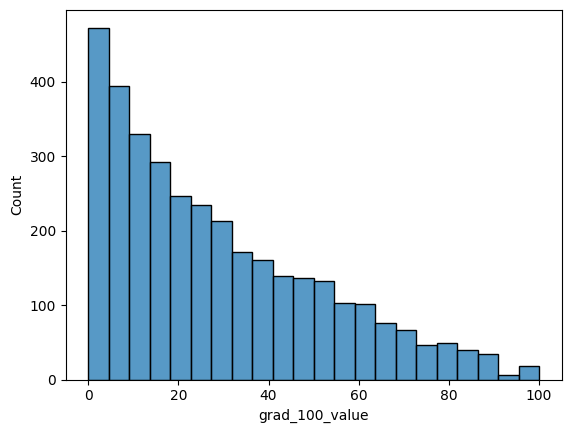

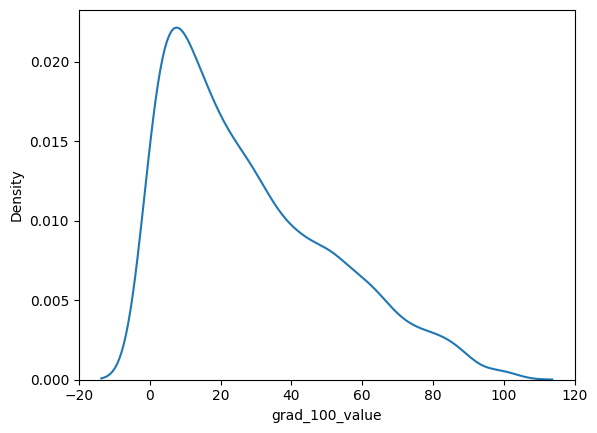

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


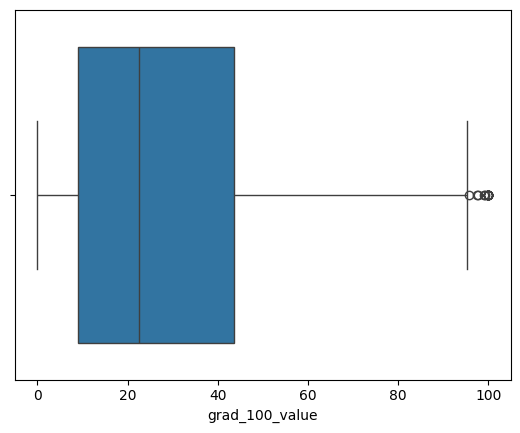

In [79]:
print(df_1['grad_100_value'].describe())

sns.histplot(df_1, x= 'grad_100_value')
plt.show()

sns.kdeplot(df_1, x= 'grad_100_value')
plt.show()

sns.boxplot(df_1, x= 'grad_100_value')
plt.show()

                              grad_100_value                             \
                                       count       mean        std  min   
control                level                                              
Private for-profit     2-year          461.0  37.197614  25.497380  0.0   
                       4-year          318.0  17.382704  20.788525  0.0   
Private not-for-profit 2-year           68.0  41.913235  28.348302  0.0   
                       4-year         1121.0  41.645674  23.243453  0.0   
Public                 2-year          926.0  12.400000  10.893600  0.0   
                       4-year          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
control                level                                
Private for-profit     2-year  15.800  33.9  57.800  100.0  
                       4-year   0.000  12.5  26.325  100.0  
Private not-for-pro

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


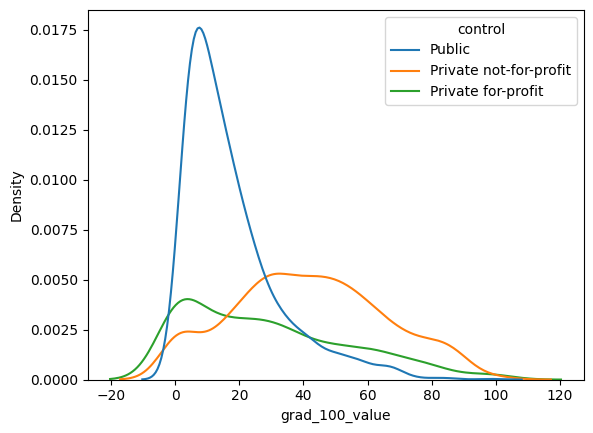

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


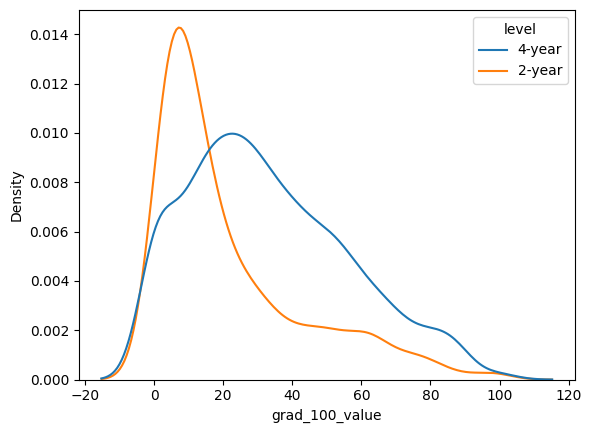

In [80]:
print(df_1[['control','level', 'grad_100_value']].groupby(['control', 'level']).describe())

sns.kdeplot(df_1, x= 'grad_100_value', hue= 'control') # Private not-for-profit colleges seem to have the best graduation rate.
plt.show()

sns.kdeplot(df_1, x= 'grad_100_value', hue= 'level')
# 4-year institutions have a better graduation rate
plt.show()

0    4-year, Public
Name: levelXcontrol, dtype: object


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


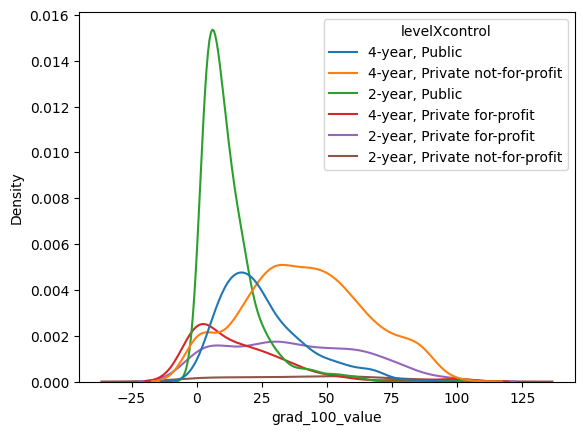

In [81]:
df_1['levelXcontrol']= df_1['level']+', '+df_1['control']
print(df_1['levelXcontrol'].head(1))
sns.kdeplot(df_1, x= 'grad_100_value', hue= 'levelXcontrol')
plt.show() # 4-year, Private not-for-profit colleges tend to have better graduation rates

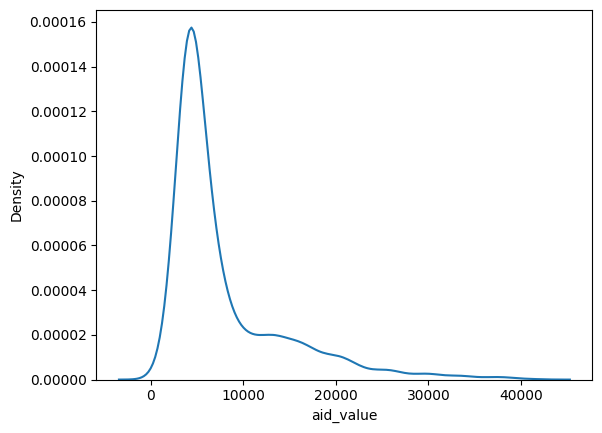

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


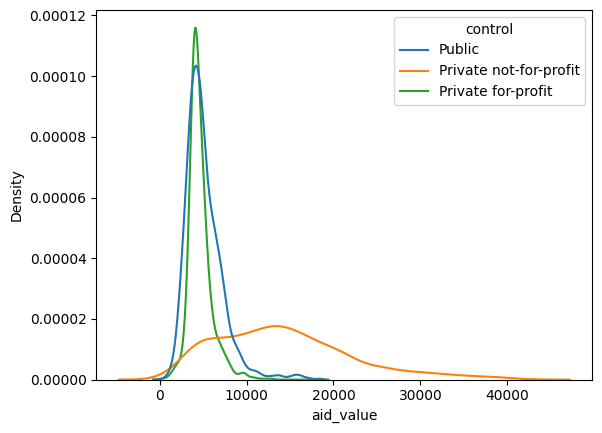

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


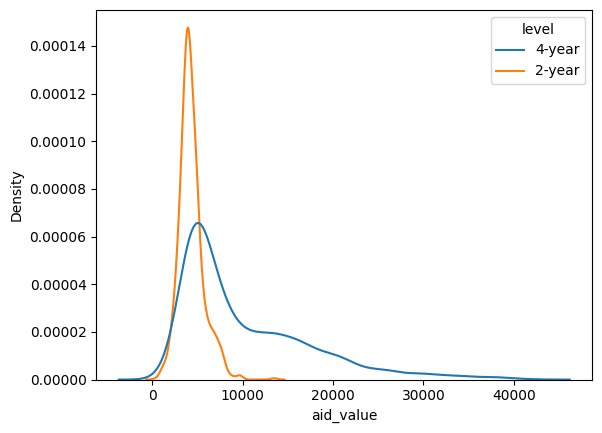

                              aid_value                                     \
                                  count          mean          std     min   
control                level                                                 
Private for-profit     2-year     464.0   4559.681034  1286.688269   294.0   
                       4-year     527.0   4696.062619  1489.410020  1580.0   
Private not-for-profit 2-year      68.0   5128.058824  2590.449946   934.0   
                       4-year    1180.0  14702.401695  7649.775203   902.0   
Public                 2-year     926.0   4126.199784  1260.271382   881.0   
                       4-year     632.0   6514.071203  2353.716693  2232.0   

                                                                    
                                   25%      50%       75%      max  
control                level                                        
Private for-profit     2-year  3818.75   4286.5   5122.00   9727.0  
                     

In [82]:
# The shape is best explained by the cost of attendance. If a student does not need a lot of aid to attend college,
# the average aid a student receives will be low. However, this not always the case.
sns.kdeplot(df_1, x= 'aid_value')
plt.show()

sns.kdeplot(df_1, x= 'aid_value', hue= 'control')
plt.show()

sns.kdeplot(df_1, x= 'aid_value', hue= 'level')
plt.show()

print(df_1[['control','level', 'aid_value']].groupby(['control', 'level']).describe())

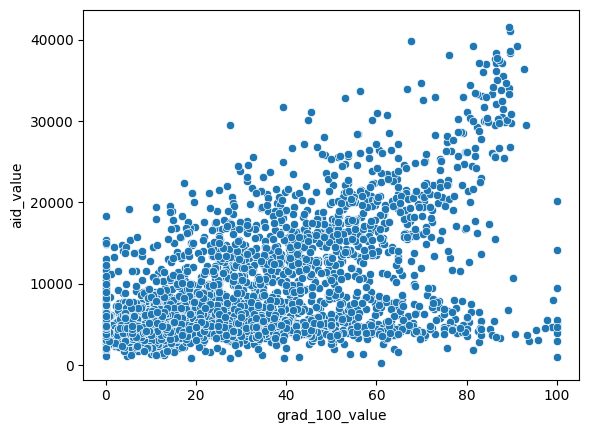

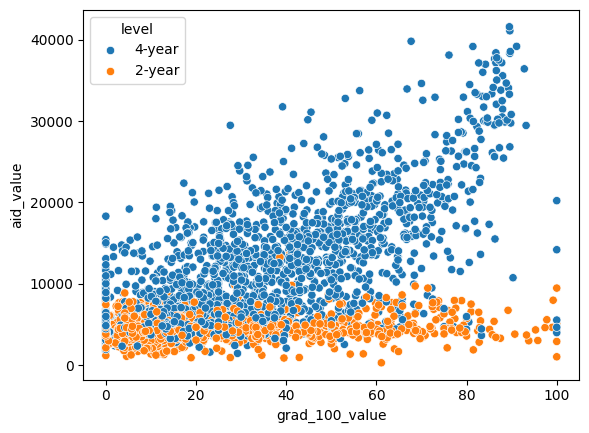

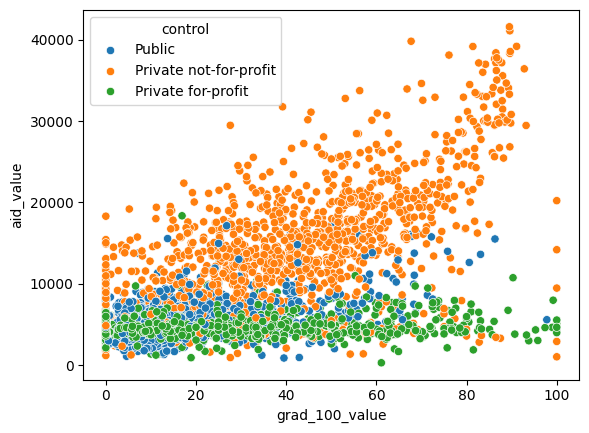

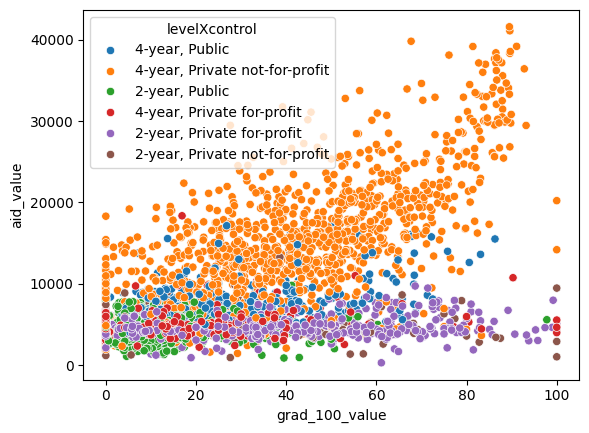

In [83]:
# Financial aid seems to increase graduation rate for 4-year Private not-for-profit colleges
sns.scatterplot(df_1, x= 'grad_100_value', y= 'aid_value')
plt.show()


sns.scatterplot(df_1, x= 'grad_100_value', y= 'aid_value', hue= 'level')
plt.show()

sns.scatterplot(df_1, x= 'grad_100_value', y= 'aid_value', hue= 'control')
plt.show()

sns.scatterplot(df_1, x= 'grad_100_value', y= 'aid_value', hue= 'levelXcontrol')
plt.show()

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [84]:
air= pd.read_csv('airbnb_hw.csv')
print(air.shape) # The data has 30478 observations and 13 columsn
air.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [85]:
# Scaling
air['Price'].unique()
air['Price']= air['Price'].str.replace(',', '')

air['Price']= pd.to_numeric(air['Price'],  errors= 'coerce')
print(air['Price'].dtypes)
air['Price'].unique()

int64


array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

In [86]:
pd.crosstab(air['Property Type'], air['Room Type']) # Private rooms are more common than renting for bed and breakfast and houses

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


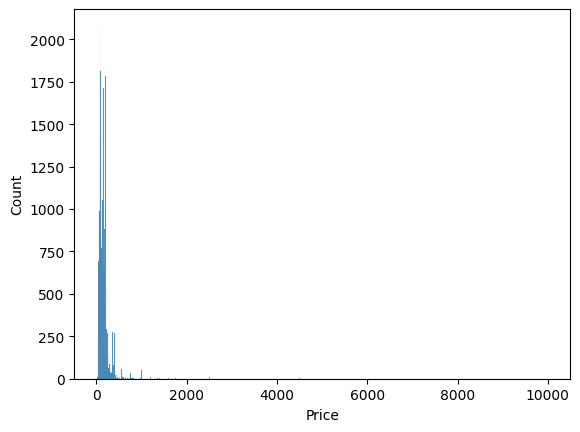

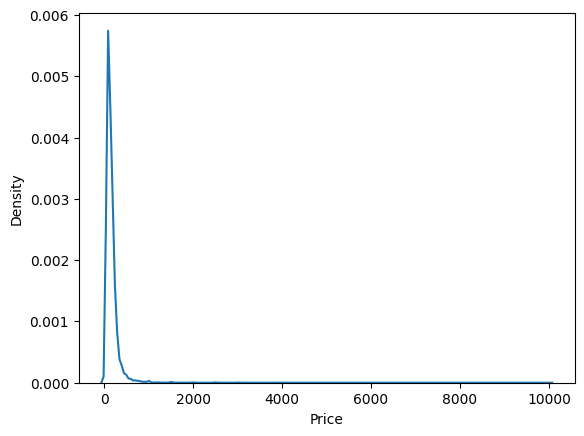

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


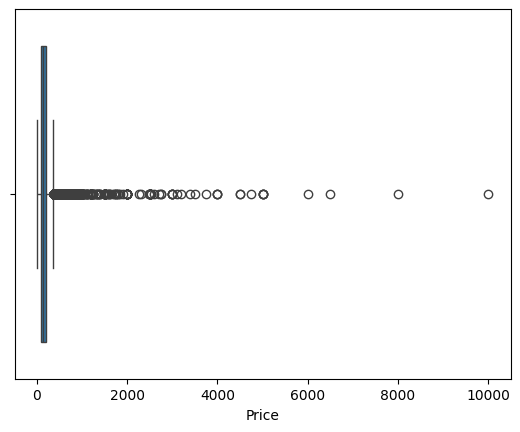

In [87]:
print(air['Price'].describe())

sns.histplot(air, x= 'Price')
plt.show()

sns.kdeplot(air, x= 'Price')
plt.show()

sns.boxplot(air, x= 'Price')
plt.show()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64


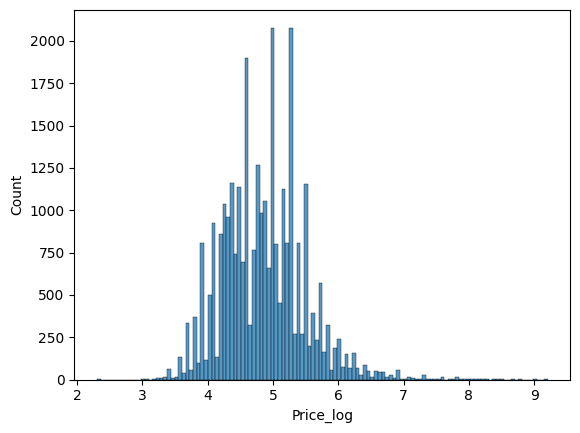

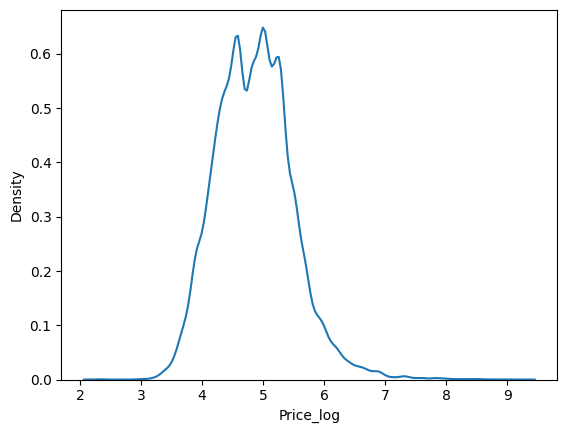

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


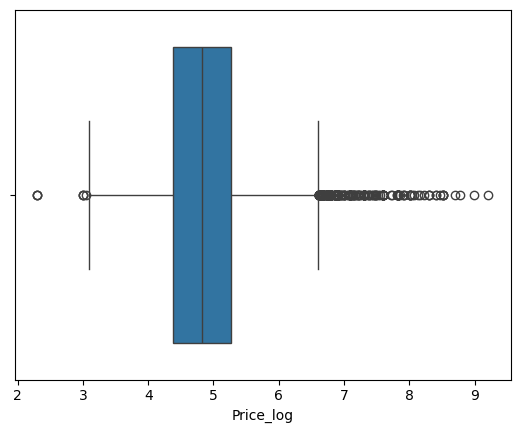

In [88]:
air['Price_log']= np.log(air['Price'])
print(air['Price_log'].describe())

sns.histplot(air, x= 'Price_log')
plt.show()

sns.kdeplot(air, x= 'Price_log')
plt.show()

sns.boxplot(air, x= 'Price_log')
plt.show()

     Price_log                                                              \
         count      mean       std       min       25%       50%       75%   
Beds                                                                         
0.0        2.0  4.476755  0.427613  4.174387  4.325571  4.476755  4.627939   
1.0    20344.0  4.686977  0.539666  2.302585  4.317488  4.605170  5.043425   
2.0     6610.0  5.094504  0.580425  3.218876  4.744932  5.075174  5.416100   
3.0     2071.0  5.340837  0.644742  3.258097  4.941642  5.298317  5.703782   
4.0      783.0  5.480463  0.721360  3.295837  5.010635  5.509388  5.926926   
5.0      284.0  5.669484  0.735623  3.555348  5.245705  5.669881  6.109248   
6.0      177.0  5.651790  0.824358  3.555348  5.293305  5.616771  6.052089   
7.0       45.0  5.617009  0.693481  4.007333  5.176150  5.703782  6.098074   
8.0       24.0  5.956200  0.862418  4.007333  5.495121  5.857933  6.176138   
9.0       15.0  6.341645  0.461176  5.164786  6.098011  6.476972

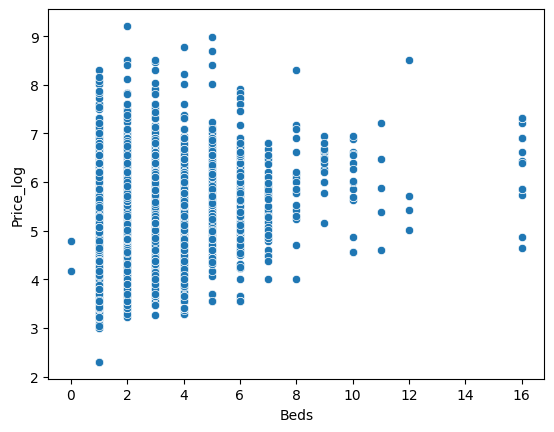

In [89]:
print(air[['Price_log', 'Beds']].groupby(['Beds']).describe())

sns.scatterplot(air, y= 'Price_log', x= 'Beds') # The price tends to increase as number of beds increases.
# As the scatter plot shows prices in the lower range disappaer as number of beds increases showing a positive relationship between
# number of beds and price. The mean and standard deviation of price overall tends to increase with number of beds
plt.show()

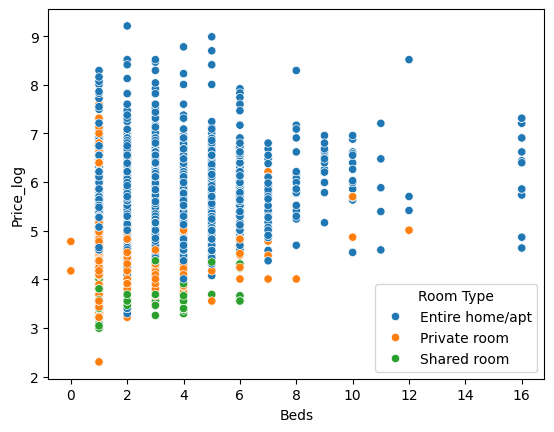

In [90]:
sns.scatterplot(air, y= 'Price_log', x= 'Beds', hue= 'Room Type') # Entire homes and apartments have a higher overall price
plt.show()

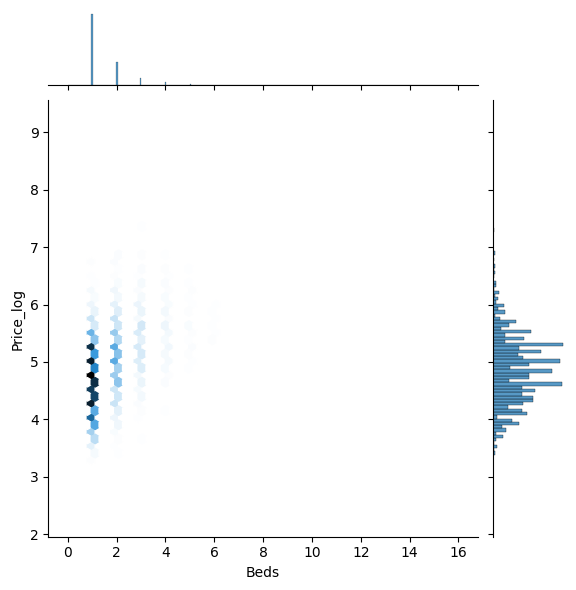

In [91]:
sns.jointplot(air, x="Beds", y="Price_log", kind='hex') # The number of beds falls between 1 and 3, with most values at 1.
# The price falls most between 4 and 6.

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

In [92]:
! pip install pdfplumber

In [98]:
! pip install tabula-py

In [102]:
# Chat GPT used here
tables = tabula.read_pdf(pdf_path, pages="all", stream=True)

Oct 02, 2024 11:12:34 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



In [103]:
tables[1]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,--- Millions of Families and Billions of Dollars ---,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0 to 103,17.3,21.8,89.5,0.9 -7.7 0.4 6.1,NaN,2.2,0.0
1,10 to 20,17.8,32.1,297.0,-14.1 -39.3 1.0 21.3,NaN,3.0,0.0
2,20 to 30,17.8,34.4,446.2,-2.6 -43.2 1.5 35.4,NaN,3.7,0.0
3,30 to 40,17.8,33.6,595.1,27.0 -29.3 2.5 49.1,NaN,4.7,0.0
4,40 to 50,17.8,33.8,798.7,68.5 -9.0 4.1 67.0,NaN,6.4,0.0
5,50 to 60,17.8,34.2,"1,066.9",121.0 17.6 6.8 88.1,NaN,8.4,0.0
6,60 to 70,17.8,35.3,"1,403.5",187.9 50.0 10.5 116.3,NaN,11.1,0.0
7,70 to 80,17.8,36.8,"1,860.8",295.6 104.6 15.5 160.3,NaN,15.2,0.0
8,80 to 90,17.8,37.8,"2,568.7",484.1 210.6 25.1 226.9,NaN,21.5,0.0
9,90 to 100,17.8,38.8,"7,337.3","1,848.8 1,211.4 175.0 383.0",NaN,61.1,18.3


In [104]:
tables[1].to_csv('CBO_data.csv') # Convert data to csv

In [105]:
cbo.columns.tolist()

['Adjusted Family',
 'Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 '---  Millions of Families and Billions of Dollars ---']

In [106]:
cbo= pd.read_csv('CBO_data.csv')
cbo

,Unnamed: 0.1,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,--- Millions of Families and Billions of Dollars ---,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,0 to 103,17.3,21.8,89.5,0.9 -7.7 0.4 6.1,NaN,2.2,0.0
1,1,10 to 20,17.8,32.1,297.0,-14.1 -39.3 1.0 21.3,NaN,3.0,0.0
2,2,20 to 30,17.8,34.4,446.2,-2.6 -43.2 1.5 35.4,NaN,3.7,0.0
3,3,30 to 40,17.8,33.6,595.1,27.0 -29.3 2.5 49.1,NaN,4.7,0.0
4,4,40 to 50,17.8,33.8,798.7,68.5 -9.0 4.1 67.0,NaN,6.4,0.0
5,5,50 to 60,17.8,34.2,"1,066.9",121.0 17.6 6.8 88.1,NaN,8.4,0.0
6,6,60 to 70,17.8,35.3,"1,403.5",187.9 50.0 10.5 116.3,NaN,11.1,0.0
7,7,70 to 80,17.8,36.8,"1,860.8",295.6 104.6 15.5 160.3,NaN,15.2,0.0
8,8,80 to 90,17.8,37.8,"2,568.7",484.1 210.6 25.1 226.9,NaN,21.5,0.0
9,9,90 to 100,17.8,38.8,"7,337.3","1,848.8 1,211.4 175.0 383.0",NaN,61.1,18.3


In [107]:
# Generated with help of Chat. Divide variables that belong to other columns but are stored in one column
cbo[['Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']] = cbo['---  Millions of Families and Billions of Dollars ---'].str.split(' ', n=3, expand=True)
cbo= cbo.drop(columns= ['---  Millions of Families and Billions of Dollars ---'])

In [109]:
# Columns renamed to match pdf
cbo.rename(columns= {'Unnamed: 0': 'Adjusted Family Income', 'Unnamed: 1': 'Families', 'Unnamed: 2': 'Individuals',
                     'Unnamed: 3': 'Family Cash Income',  'Unnamed: 5': 'Excises and Customs',  'Unnamed: 6': 'Estate and Gift Taxes',
                      'Unnamed: 0.1': 'Index'}, inplace= True)

In [110]:
cbo= cbo.drop(columns= ['Unnamed: 4']) # Column dropped because it contains only NA's

In [226]:
print(cbo.shape) # CBO data has 47 observations and 11 columns
cbo

(47, 11)


,Index,Adjusted Family Income,Families,Individuals,Family Cash Income,Excises and Customs,Estate and Gift Taxes,Total Federal Taxes,Individual Income Taxes,Corporate Income Taxes,Payroll Taxes
0,0,0 to 103,17.3,21.8,89.5,2.2,0.0,0.9,-7.7,0.4,6.1
1,1,10 to 20,17.8,32.1,297.0,3.0,0.0,-14.1,-39.3,1.0,21.3
2,2,20 to 30,17.8,34.4,446.2,3.7,0.0,-2.6,-43.2,1.5,35.4
3,3,30 to 40,17.8,33.6,595.1,4.7,0.0,27.0,-29.3,2.5,49.1
4,4,40 to 50,17.8,33.8,798.7,6.4,0.0,68.5,-9.0,4.1,67.0
5,5,50 to 60,17.8,34.2,"1,066.9",8.4,0.0,121.0,17.6,6.8,88.1
6,6,60 to 70,17.8,35.3,"1,403.5",11.1,0.0,187.9,50.0,10.5,116.3
7,7,70 to 80,17.8,36.8,"1,860.8",15.2,0.0,295.6,104.6,15.5,160.3
8,8,80 to 90,17.8,37.8,"2,568.7",21.5,0.0,484.1,210.6,25.1,226.9
9,9,90 to 100,17.8,38.8,"7,337.3",61.1,18.3,"1,848.8","1,211.4",175.0,383.0


In [121]:
# Divide data into distinct parts represented in dataframe
mfbd= cbo.iloc[0:15,:]
percent_dist = cbo.iloc[16:31, :]
average_rates = cbo.iloc[32:, [0, 1, 5, 6, 7, 8, 9, 10]]

In [137]:
cbo_1= pd.concat([mfbd, percent_dist, average_rates]) ## Realized in retrospect, but melt could have been applied on data
cbo_1

,Index,Adjusted Family Income,Families,Individuals,Family Cash Income,Excises and Customs,Estate and Gift Taxes,Total Federal Taxes,Individual Income Taxes,Corporate Income Taxes,Payroll Taxes
0,0,0 to 103,17.3,21.8,89.5,2.2,0.0,0.9,-7.7,0.4,6.1
1,1,10 to 20,17.8,32.1,297.0,3.0,0.0,-14.1,-39.3,1.0,21.3
2,2,20 to 30,17.8,34.4,446.2,3.7,0.0,-2.6,-43.2,1.5,35.4
3,3,30 to 40,17.8,33.6,595.1,4.7,0.0,27.0,-29.3,2.5,49.1
4,4,40 to 50,17.8,33.8,798.7,6.4,0.0,68.5,-9.0,4.1,67.0
5,5,50 to 60,17.8,34.2,1066.9,8.4,0.0,121.0,17.6,6.8,88.1
6,6,60 to 70,17.8,35.3,1403.5,11.1,0.0,187.9,50.0,10.5,116.3
7,7,70 to 80,17.8,36.8,1860.8,15.2,0.0,295.6,104.6,15.5,160.3
8,8,80 to 90,17.8,37.8,2568.7,21.5,0.0,484.1,210.6,25.1,226.9
9,9,90 to 100,17.8,38.8,7337.3,61.1,18.3,1848.8,1211.4,175.0,383.0


In [122]:
print('MFBD', mfbd.dtypes)
mfbd[['Family Cash Income','Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']] = mfbd[['Family Cash Income','Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']].apply(lambda x: x.str.replace(',', ''))
mfbd[['Family Cash Income','Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']] = mfbd[['Family Cash Income','Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']].apply(pd.to_numeric)
print(mfbd.dtypes)

print('PD', percent_dist.dtypes)
percent_dist[['Family Cash Income','Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']] = percent_dist[['Family Cash Income','Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']].apply(lambda x: x.str.replace(',', ''))
percent_dist[['Family Cash Income','Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']] = percent_dist[['Family Cash Income','Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']].apply(pd.to_numeric)
print(percent_dist.dtypes)


print('AR', average_rates.dtypes)
average_rates[['Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']] = average_rates[['Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']].apply(lambda x: x.str.replace(',', ''))
average_rates[['Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']] = average_rates[['Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']].apply(pd.to_numeric)
print(average_rates.dtypes)


MFBD Index                        int64
Adjusted Family Income      object
Families                   float64
Individuals                float64
Family Cash Income          object
Excises and Customs        float64
Estate and Gift Taxes      float64
Total Federal Taxes         object
Individual Income Taxes     object
Corporate Income Taxes      object
Payroll Taxes               object
dtype: object
Index                        int64
Adjusted Family Income      object
Families                   float64
Individuals                float64
Family Cash Income         float64
Excises and Customs        float64
Estate and Gift Taxes      float64
Total Federal Taxes        float64
Individual Income Taxes    float64
Corporate Income Taxes     float64
Payroll Taxes              float64
dtype: object
PD Index                        int64
Adjusted Family Income      object
Families                   float64
Individuals                float64
Family Cash Income          object
Excises and Customs

<ipython-input-122-bbc2cde5bb38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfbd[['Family Cash Income','Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']] = mfbd[['Family Cash Income','Total Federal Taxes', 'Individual Income Taxes', 'Corporate Income Taxes', 'Payroll Taxes']].apply(lambda x: x.str.replace(',', ''))
<ipython-input-122-bbc2cde5bb38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfbd[['Family Cash Income','Total Federal Taxes', 'Individual In

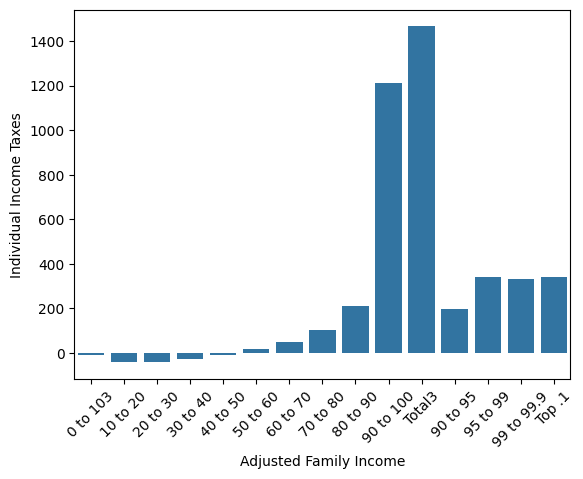

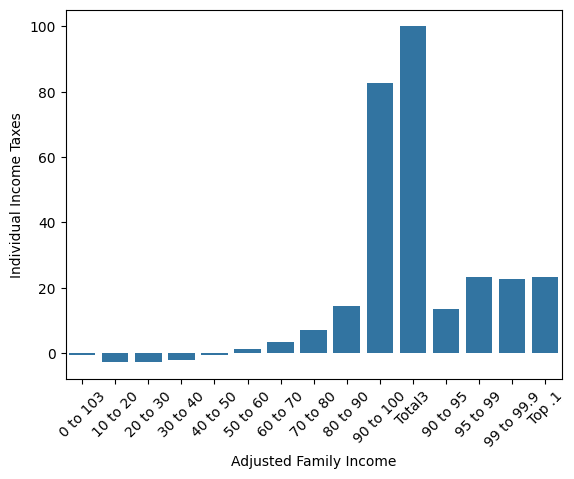

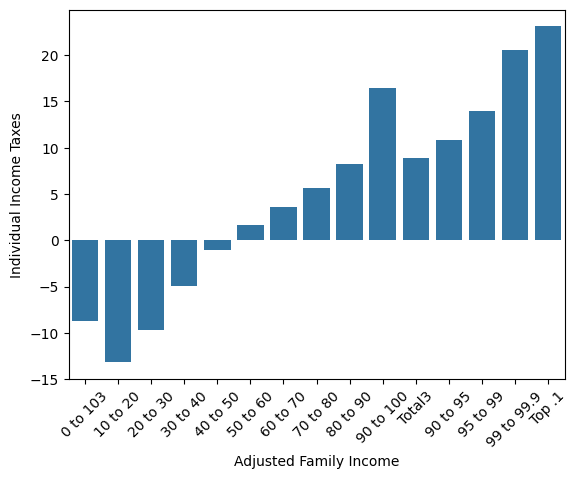

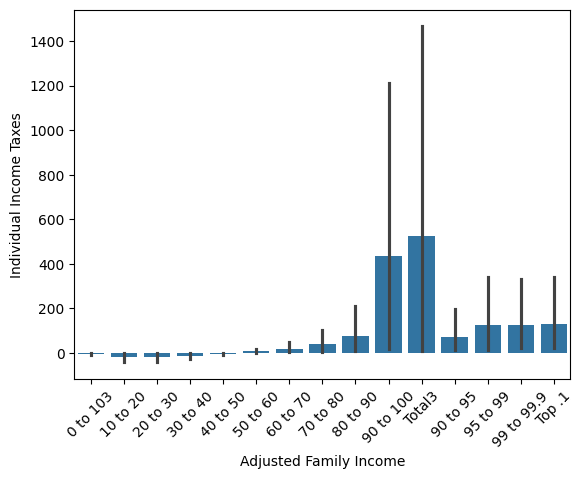

In [232]:
# The US tax system does not seem progressive as higher income individuals pay less taxes. I do not like to be in the pockets of other people
#but I think the wealthy do not pay enough taxes. In addition to that, most wealthy people own coorporations and
# are working people and the environment so it would be nice if they contributed back through taxes, but even in our tax system,
# this is no obligation.
sns.barplot(data= mfbd, x= 'Adjusted Family Income', y= 'Individual Income Taxes', orient='v')
plt.xticks(rotation=45)
plt.show()

sns.barplot(data= percent_dist, x= 'Adjusted Family Income', y= 'Individual Income Taxes', orient='v')
plt.xticks(rotation=45)
plt.show()

sns.barplot(data= average_rates, x= 'Adjusted Family Income', y= 'Individual Income Taxes', orient='v')
plt.xticks(rotation=45)
plt.show()

sns.barplot(data= cbo_1, x= 'Adjusted Family Income', y= 'Individual Income Taxes', orient='v')
plt.xticks(rotation=45)
plt.yticks(rotation= 0)
plt.show()

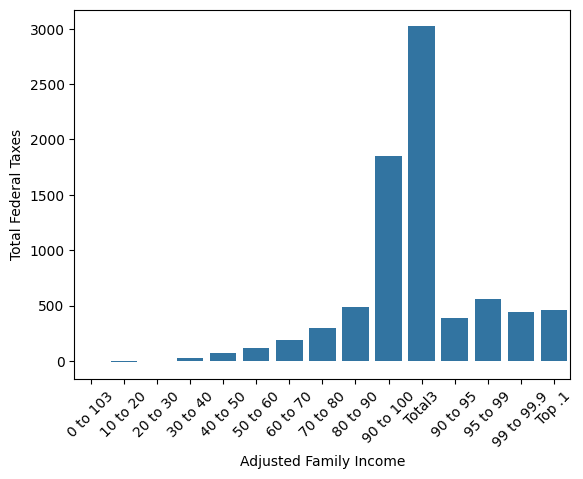

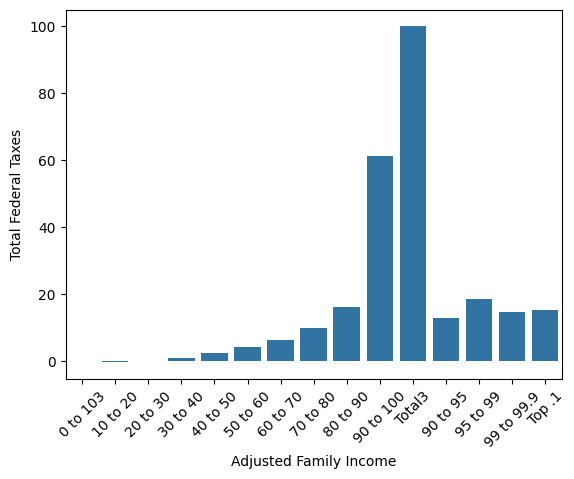

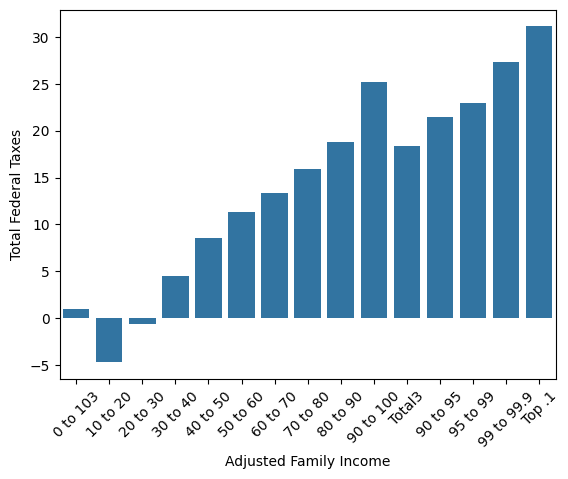

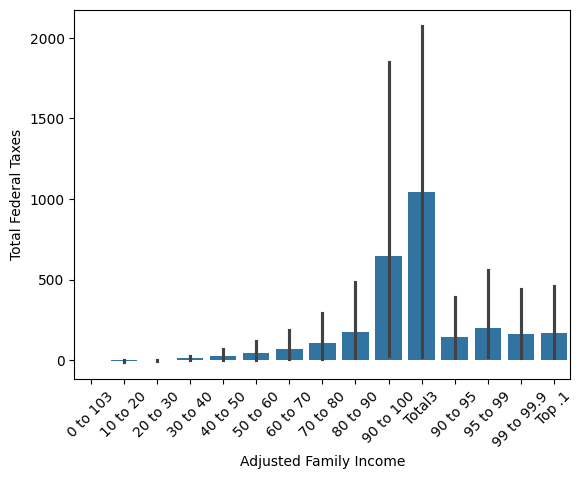

In [233]:
sns.barplot(data= mfbd, x= 'Adjusted Family Income', y= 'Total Federal Taxes', orient='v')
plt.xticks(rotation=45)
plt.show()

sns.barplot(data= percent_dist, x= 'Adjusted Family Income', y= 'Total Federal Taxes', orient='v')
plt.xticks(rotation=45)
plt.show()

sns.barplot(data= average_rates, x= 'Adjusted Family Income', y= 'Total Federal Taxes', orient='v')
plt.xticks(rotation=45)
plt.show()


sns.barplot(data= cbo_1, x= 'Adjusted Family Income', y= 'Total Federal Taxes', orient='v')
plt.xticks(rotation=45)
plt.show()

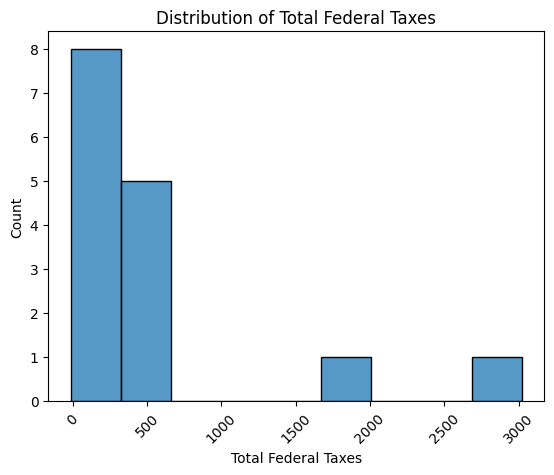

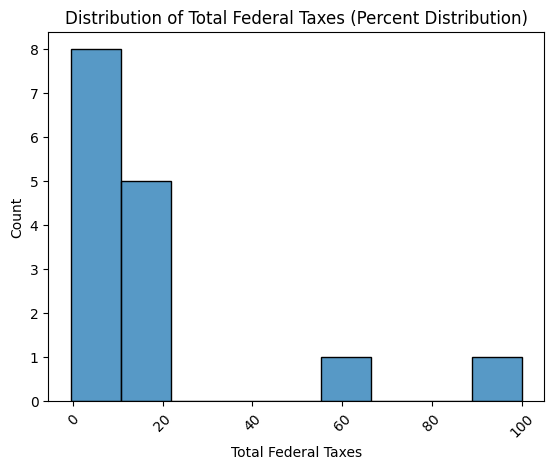

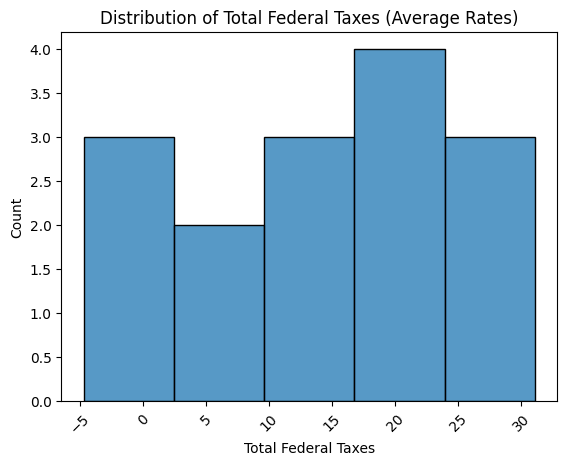

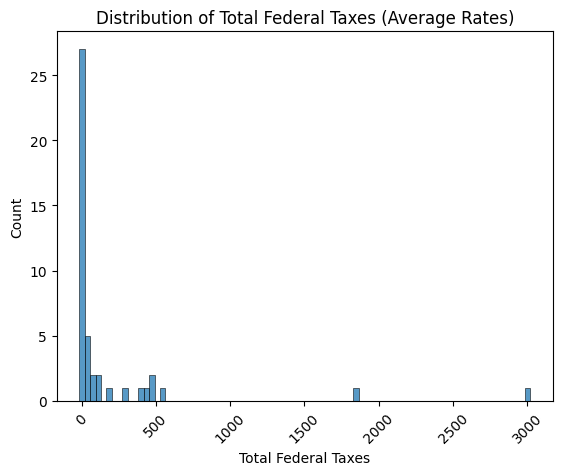

In [147]:
sns.histplot(data= mfbd, x= 'Total Federal Taxes')
plt.xticks(rotation=45 )
plt.title("Distribution of Total Federal Taxes")
plt.show()

sns.histplot(data= percent_dist, x= 'Total Federal Taxes')
plt.xticks(rotation=45 )
plt.title("Distribution of Total Federal Taxes (Percent Distribution)")
plt.show()

sns.histplot(data= average_rates, x= 'Total Federal Taxes')
plt.xticks(rotation=45 )
plt.title("Distribution of Total Federal Taxes (Average Rates)")
plt.show()

sns.histplot(data= cbo_1, x= 'Total Federal Taxes')
plt.xticks(rotation=45 )
plt.title("Distribution of Total Federal Taxes (Average Rates)")
plt.show()

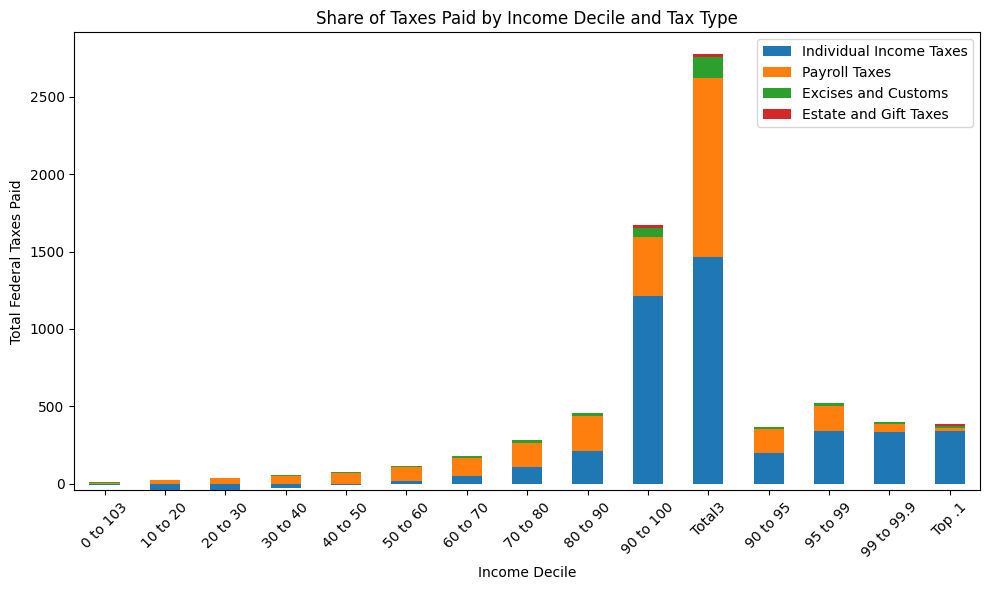

In [136]:
# Generated with help of Gemini
# The pivot function requires the 'columns' argument. Since this is a stacked bar plot, there is no need to call the pivot function.
df_melted = mfbd[['Adjusted Family Income', 'Individual Income Taxes', 'Payroll Taxes', 'Excises and Customs', 'Estate and Gift Taxes']]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create a pivot table to make plotting easier
# df_pivot = df.pivot(index='Adjusted Family Income', columns=None, values=['Individual Income Taxes', 'Payroll Taxes', 'Excises and Customs', 'Estate and Gift Taxes'])
# The variable 'df' is not defined. Using 'mfbd' instead.
# The pivot function requires the 'columns' argument. Since this is a stacked bar plot, there is no need to call the pivot function.
df_pivot = mfbd[['Adjusted Family Income', 'Individual Income Taxes', 'Payroll Taxes', 'Excises and Customs', 'Estate and Gift Taxes']].set_index('Adjusted Family Income')

# Plot the stacked bar chart
df_pivot.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('Share of Taxes Paid by Income Decile and Tax Type')
ax.set_ylabel('Total Federal Taxes Paid')
ax.set_xlabel('Income Decile')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

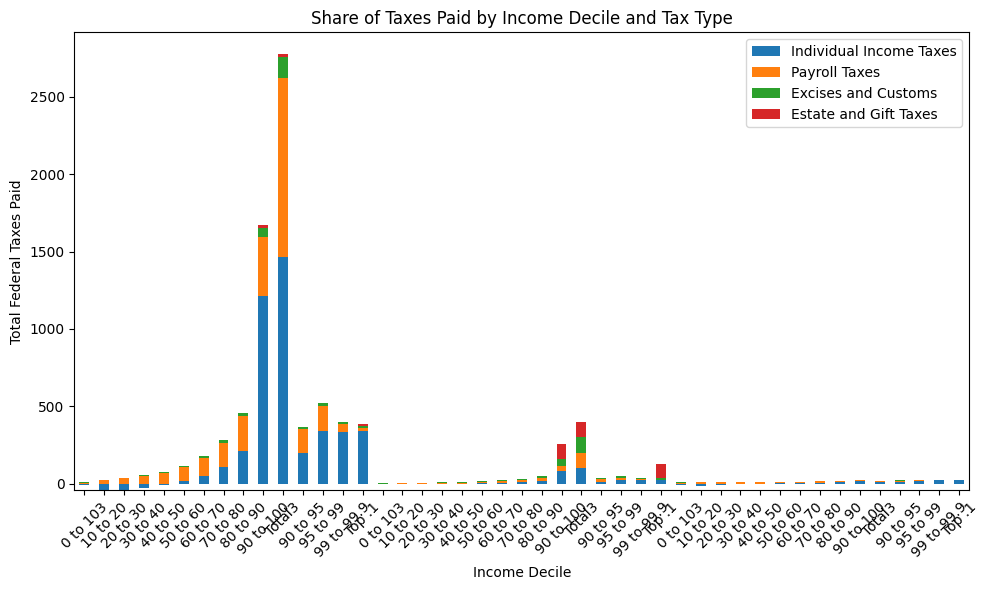

In [148]:
df_cbo = cbo_1[['Adjusted Family Income', 'Individual Income Taxes', 'Payroll Taxes', 'Excises and Customs', 'Estate and Gift Taxes']]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

df_pivot = cbo_1[['Adjusted Family Income', 'Individual Income Taxes', 'Payroll Taxes', 'Excises and Customs', 'Estate and Gift Taxes']].set_index('Adjusted Family Income')

# Plot the stacked bar chart
df_pivot.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('Share of Taxes Paid by Income Decile and Tax Type')
ax.set_ylabel('Total Federal Taxes Paid')
ax.set_xlabel('Income Decile')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

There is no document of how missing data is handled. The glossary describes the variables in the dataset and what they mean, however it does not give any more insight. For someone with no background knowledge of medicare, the glossary was sufficient. Further, the sheet I choose from my dataset contained no missing values so there was no need to mention how they were handled.

In [206]:
#cms= pd.read_excel('CMS_Program21.xlsx')
xls = pd.ExcelFile('CMS_Program21.xlsx')
cms = pd.read_excel(xls, 'MDCR HHA 1', header=3) # using CMS file, select MDCR HHA 1 and use 3 row as header

In [208]:
print(cms.shape)
cms.head()

(31, 15)


,Type of Entitlement and Calendar Year,Total Original Medicare Enrollees,Total Persons With Utilization,Total Service Visits,Service Visits Per Person With Utilization,"Service Visits Per 1,000 Original Medicare Enrollees",Total Episodes¹,Service Visits Per Episode,Episodes Per Person With Utilization,"Episodes Per 1,000 Original Medicare Enrollees",Total Program Payments,Program Payments Per Service Visit,Program Payments Per Episode,Program Payments Per Person With Utilization,Program Payments Per Original Medicare Enrollee
0,BLANK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All Beneficiaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,38610384.0,3451590.0,108334992.0,31.39,2806.0,6516366.0,16.63,1.89,169.0,1.811702e+10,167.0,2780.0,5249.0,469.0
3,2017,38667830.0,3392931.0,104825686.0,30.90,2711.0,6316475.0,16.60,1.86,163.0,1.783084e+10,170.0,2823.0,5255.0,461.0
4,2018,38665082.0,3365951.0,103969027.0,30.89,2689.0,6236655.0,16.67,1.85,161.0,1.793405e+10,172.0,2876.0,5328.0,464.0


In [209]:
cms= cms.iloc[1:24, :]
cms

,Type of Entitlement and Calendar Year,Total Original Medicare Enrollees,Total Persons With Utilization,Total Service Visits,Service Visits Per Person With Utilization,"Service Visits Per 1,000 Original Medicare Enrollees",Total Episodes¹,Service Visits Per Episode,Episodes Per Person With Utilization,"Episodes Per 1,000 Original Medicare Enrollees",Total Program Payments,Program Payments Per Service Visit,Program Payments Per Episode,Program Payments Per Person With Utilization,Program Payments Per Original Medicare Enrollee
1,All Beneficiaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,38610384.0,3451590.0,108334992.0,31.39,2806.0,6516366.0,16.63,1.89,169.0,1.811702e+10,167.0,2780.0,5249.0,469.0
3,2017,38667830.0,3392931.0,104825686.0,30.90,2711.0,6316475.0,16.60,1.86,163.0,1.783084e+10,170.0,2823.0,5255.0,461.0
4,2018,38665082.0,3365951.0,103969027.0,30.89,2689.0,6236655.0,16.67,1.85,161.0,1.793405e+10,172.0,2876.0,5328.0,464.0
5,2019,38577012.0,3281493.0,100229366.0,30.54,2598.0,6047416.0,16.57,1.84,157.0,1.785086e+10,178.0,2952.0,5440.0,463.0
6,2020,37776345.0,3054588.0,84201058.0,27.57,2229.0,9081444.0,9.27,2.97,240.0,1.708233e+10,203.0,1881.0,5592.0,452.0
7,2021,36356380.0,3018466.0,76785088.0,25.44,2112.0,9279712.0,8.27,3.07,255.0,1.687283e+10,220.0,1818.0,5590.0,464.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Aged Beneficiaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2016,32204203.0,3032339.0,95042231.0,31.34,2951.0,5647600.0,16.83,1.86,175.0,1.594090e+10,168.0,2823.0,5257.0,495.0


In [210]:
cms_columns= cms.columns.tolist() #What columns are in dataset?
cms_columns[1:]

['Total Original Medicare Enrollees',
 'Total Persons With Utilization',
 'Total Service Visits',
 'Service Visits Per Person With Utilization',
 'Service Visits Per 1,000 Original Medicare Enrollees',
 'Total Episodes¹',
 'Service Visits Per Episode',
 'Episodes Per Person With Utilization',
 'Episodes Per 1,000 Original Medicare Enrollees',
 'Total Program Payments',
 'Program Payments Per Service Visit',
 'Program Payments Per Episode',
 'Program Payments Per Person With Utilization',
 'Program Payments Per Original Medicare Enrollee']

In [211]:
cms_melt= pd.melt(cms, id_vars=['Type of Entitlement and Calendar Year'], value_vars= cms_columns[1:])
cms_melt.head(10)

,Type of Entitlement and Calendar Year,variable,value
0,All Beneficiaries,Total Original Medicare Enrollees,NaN
1,2016,Total Original Medicare Enrollees,38610384.0
2,2017,Total Original Medicare Enrollees,38667830.0
3,2018,Total Original Medicare Enrollees,38665082.0
4,2019,Total Original Medicare Enrollees,38577012.0
5,2020,Total Original Medicare Enrollees,37776345.0
6,2021,Total Original Medicare Enrollees,36356380.0
7,NaN,Total Original Medicare Enrollees,NaN
8,Aged Beneficiaries,Total Original Medicare Enrollees,NaN
9,2016,Total Original Medicare Enrollees,32204203.0


In [216]:
cms_melt.dtypes
cms_melt['value'].describe() # These are numbers we can not see on graph

,value
count,2.520000e+02
mean,8.456991e+08
std,3.558613e+09
min,1.820000e+00
25%,1.655000e+02
50%,2.563000e+03
75%,5.372678e+06
max,1.811702e+10


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


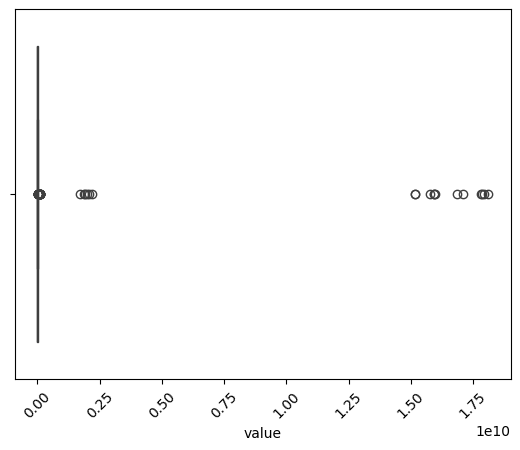

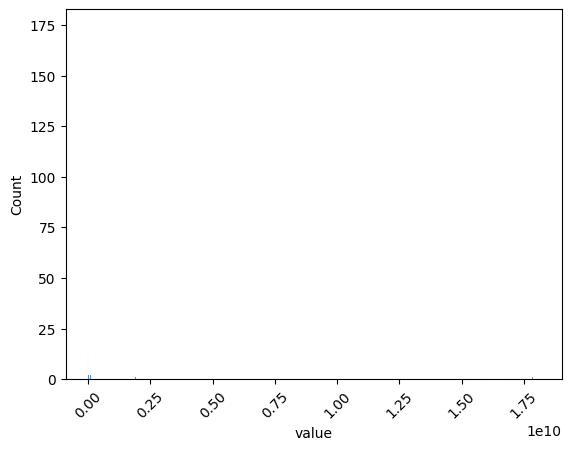

In [212]:
 ## Badly scaled Data
sns.boxplot(data= cms_melt, x= 'value') #Unscaled data shows a lot of outliers
plt.xticks(rotation=45)
plt.show()

sns.histplot(data= cms_melt, x= 'value')
plt.xticks(rotation=45)
plt.show()

In [217]:
cms_melt['value_log']= np.log(cms_melt['value']) # Scale data with log
cms_melt.describe()

,value,value_log
count,2.520000e+02,252.000000
mean,8.456991e+08,9.556968
std,3.558613e+09,6.394151
min,1.820000e+00,0.598837
25%,1.655000e+02,5.108957
50%,2.563000e+03,7.848906
75%,5.372678e+06,15.496787
max,1.811702e+10,23.620118


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


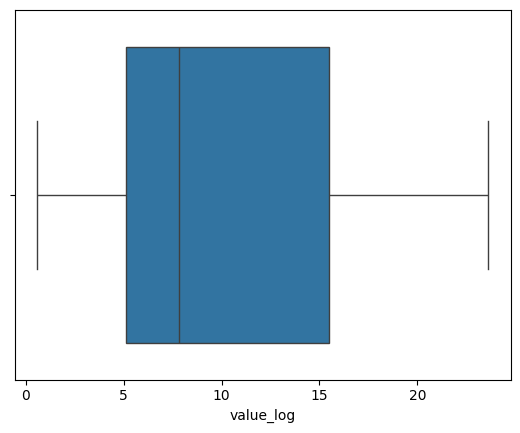

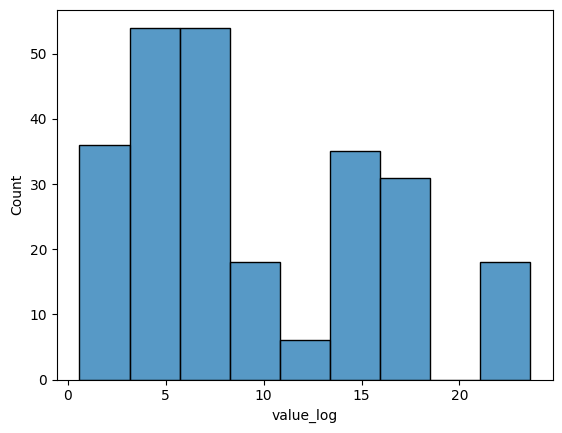

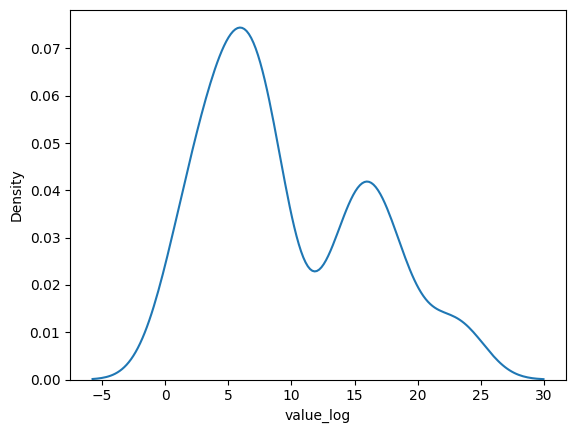

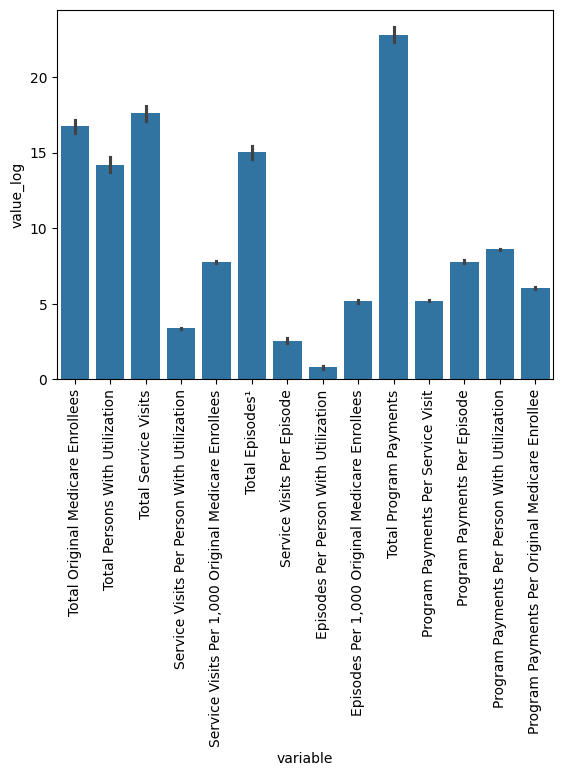

In [225]:
# Much better view of the price distribution
sns.boxplot(data= cms_melt, x= 'value_log') # The payment is skewed right
plt.show() #The blue box is where most of the data are held. The vertical line to the left is the minimum payment(scaled)
# The vertical line to the right of the box is the maximum payment. The end of the box to the right is 25%, line in the box 50%,
#and the end of box to the right is where 75% of the payment value lies.

sns.histplot(data= cms_melt, x= 'value_log') # Histogram supports the idea that the data is skewed right and is not normally distributed.
# Histogram also shows that most of the payment values lie between 0 and approximatly 8
plt.show()

sns.kdeplot(data= cms_melt, x= 'value_log') # The distribution of the payment is bimodal, reaching its peak at around 5, and again at around 17
plt.show()

sns.barplot(data= cms_melt, x= 'variable', y= 'value_log')
plt.xticks(rotation=90) # Most of the payments went to Service Visits Per 1,000 Original Medicare Enrollees and Program Payments Per Person With Utilization
plt.show()

# Can not create a scatterplot

In [224]:
pd.crosstab(cms_melt['variable'], cms_melt['Type of Entitlement and Calendar Year']) # This cross tabulation in a way describes how our data looks
# There are 3 categories(Aged, Dusabled, and All Beneficiaries) and for each category, there are 3 values for each variable and observation.

Type of Entitlement and Calendar Year,2016,2017,2018,2019,2020,2021,Aged Beneficiaries,All Beneficiaries,Disabled Beneficiaries
variable,,,,,,,,,
"Episodes Per 1,000 Original Medicare Enrollees",3,3,3,3,3,3,1,1,1
Episodes Per Person With Utilization,3,3,3,3,3,3,1,1,1
Program Payments Per Episode,3,3,3,3,3,3,1,1,1
Program Payments Per Original Medicare Enrollee,3,3,3,3,3,3,1,1,1
Program Payments Per Person With Utilization,3,3,3,3,3,3,1,1,1
Program Payments Per Service Visit,3,3,3,3,3,3,1,1,1
"Service Visits Per 1,000 Original Medicare Enrollees",3,3,3,3,3,3,1,1,1
Service Visits Per Episode,3,3,3,3,3,3,1,1,1
Service Visits Per Person With Utilization,3,3,3,3,3,3,1,1,1
